# <font color = 'midnightblue'> **The logistic Regression & KNN Classification**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline    
#import HelpfulFunctions as hp 

In [6]:
def cost(p,y):
    c = (p**y) * ((1-p)**(1-y))
    return c 

In [7]:
cost(0.3,.4)

0.49877804185215613

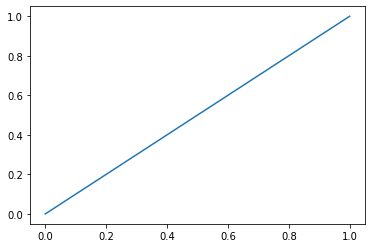

In [8]:
p = np.linspace(0,1,100)
y = +1
cvec = cost(p,y)
plt.plot(p,cvec)

## load Iris dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
x= pd.DataFrame(iris.data)
x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
x.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']
x.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# load the labels
y = iris.target


In [7]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
species = []
for i in y:
    name = iris['target_names'][i]
    species.append(name)

In [10]:
x['species'] = species

In [11]:
x.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
x.tail()

,sepalLength,sepalWidth,petalLength,petalWidth,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# feature space plots

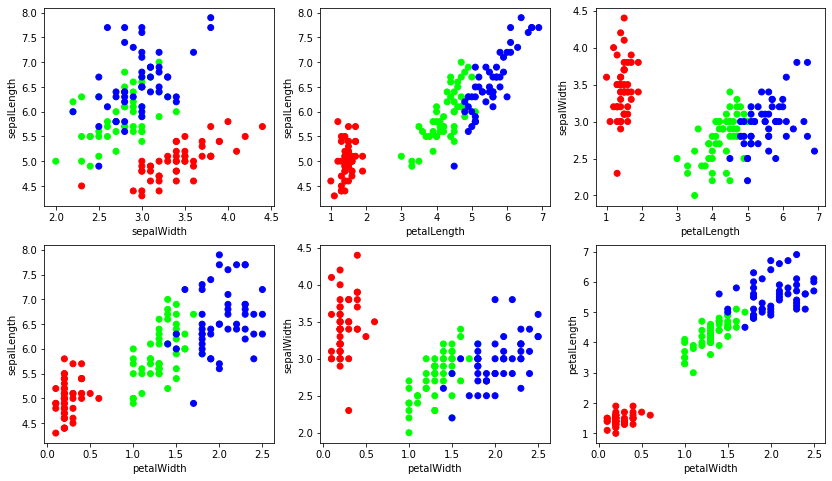

In [13]:
plt_idx = 1
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.figure(figsize=(14,8))

for index1 in range(0,4):
    for index2 in range(0,index1):
        f1 = x.columns[index1]
        f2 = x.columns[index2]
        x1 = x[f1]
        x2 = x[f2]
        plt.subplot(2,3,plt_idx)
        plt.scatter(x1,x2,c=y,cmap=cmap_bold)
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt_idx = plt_idx+1

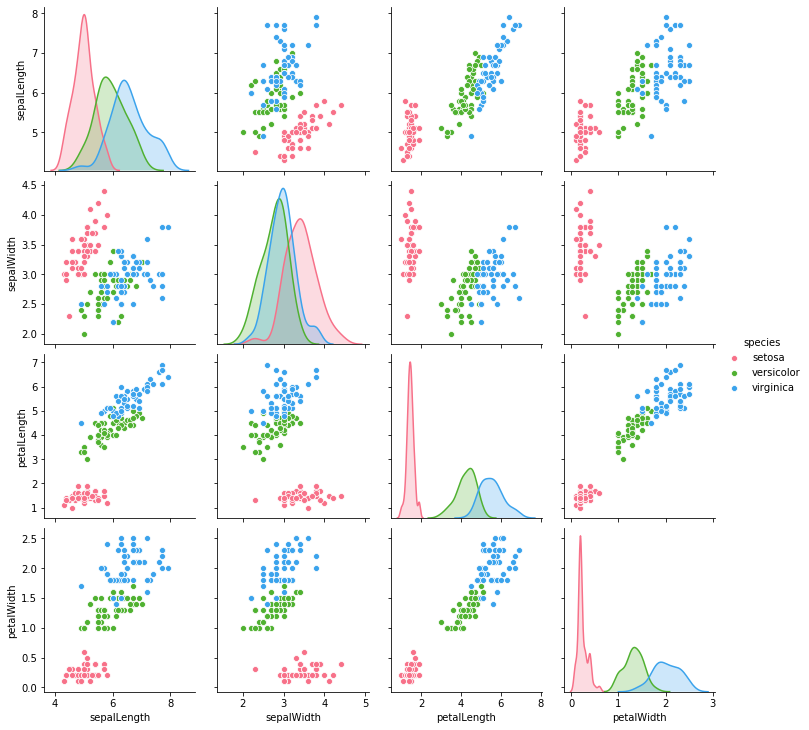

In [14]:
import seaborn as sns       
sns.pairplot(data=x,hue='species',palette='husl')

## Case Study of logistic Regression

### use Logistic regression to determine whether a given iris is a Virginica or not

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
#Buiding a model with one feature

In [17]:

x_1 = x['petalLength']
x_1 = x_1.values.reshape(150,1)
x_1

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [18]:
y = iris['target']
y = (np.array(y) == 2).astype(np.int)
#convert tuple true or false to integer, if Virginica then 1 if not 0

In [19]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
#fit the model
logit_reg = LogisticRegression(solver='liblinear') 
#liblinear solver used for small dataset and one-VS-more scheme 
logit_reg.fit(x_1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
logit_reg.coef_

array([[0.98677372]])

In [22]:
logit_reg.intercept_

array([-4.70469008])

In [23]:
min(x_1)

array([1.])

In [24]:
max(x_1)

array([6.9])

In [25]:
#predict the probability of it being Iris Virginica
# first generate 1000 x_values (petalLength) from min() to max()
x_new = np.linspace(1,6.9,1000).reshape(-1,1) #convert to col vector
y_prob = logit_reg.predict_proba(x_new)

In [26]:
y_prob

array([[0.97629124, 0.02370876],
       [0.97615597, 0.02384403],
       [0.97601995, 0.02398005],
       ...,
       [0.10983839, 0.89016161],
       [0.10926987, 0.89073013],
       [0.10870394, 0.89129606]])

In [27]:
y_2 = 1/(1 + np.exp(-logit_reg.intercept_ - x_new*logit_reg.coef_[0]))

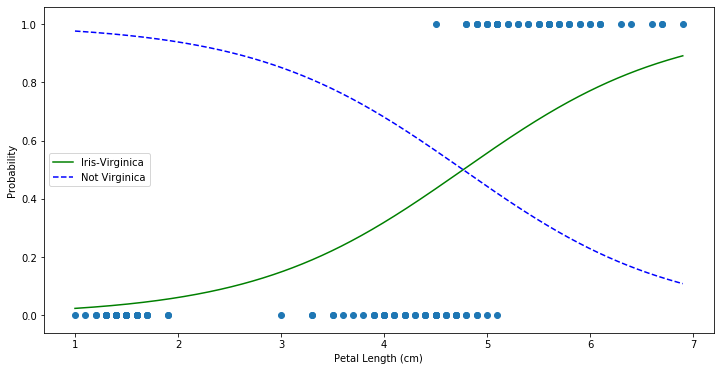

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(x_1,y)
plt.plot(x_new,y_prob[:,1],'g-',label = 'Iris-Virginica')
plt.plot(x_new,y_prob[:,0],'b--',label = 'Not Virginica')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.legend(loc = 'center left')

In [29]:
# produce a fancier figure
decision_boundary = x_new[y_prob[:,1]>= 0.5][0]
decision_boundary

array([4.76796797])

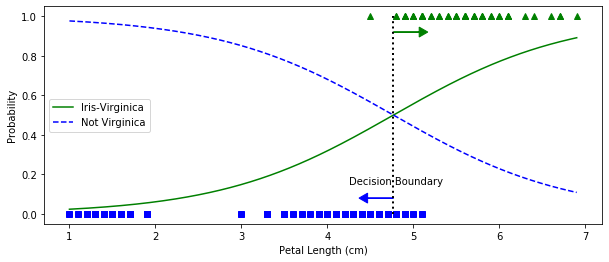

In [30]:
plt.figure(figsize=(10,4))
plt.plot(x_1[y==0],y[y==0],'bs') #blue square
plt.plot(x_1[y==1],y[y==1],'g^') #green triangle
plt.plot([decision_boundary,decision_boundary],[0,1],'k:',linewidth=2)
plt.plot(x_new,y_prob[:,1],'g-',label = 'Iris-Virginica')
plt.plot(x_new,y_prob[:,0],'b--',label = 'Not Virginica')
plt.text(decision_boundary+0.03,0.15,"Decision Boundary",fontsize=10,color='k',ha='center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability')
plt.legend(loc = 'center left')

In [31]:
y_pred = logit_reg.predict(x_1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [32]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [33]:
y-y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [34]:
# -1 the case where it is not virginica but predicted as it is, incorrect - 6 times
# +1 the case where it is virginica but predicted as it is not, - happens once

In [35]:
## All 4 features

In [36]:
x_4 = x.drop(['species'],axis=1)
logit_reg.fit(x_4,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
print(logit_reg.coef_)

[[-1.70751526 -1.53427768  2.47096755  2.55537041]]


In [38]:
print(logit_reg.intercept_)

[-1.21470917]


In [39]:
y_pred_4 = logit_reg.predict(x_4)
print(y_pred_4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [40]:
y-y_pred_4

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [41]:
# incorrect case happens 3 times

## **Visualize the Feature space**

In [42]:
#plot function from HelpfulFunctions module
def featureSpacePlot(Xname,Yname,data,y,classifier,plt,titleName=""):
    
    h = .01  # step size in the mesh
    X = data[Xname]
    Y = data[Yname]
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.min() - .05, X.max() + .05
    y_min, y_max = Y.min() - .05, Y.max() + .05
    nx = int((x_max - x_min)/ h)
    ny = int((y_max - y_min)/ h)
    g1 = np.linspace(x_min, x_max, nx)
    g2 = np.linspace(y_min, y_max, ny)
    xx, yy = np.meshgrid(g1,g2)
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # Plot also the training points
    plt.scatter(X,Y, c=y, edgecolors='k', cmap=cmap_bold, alpha = 1.0)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_bold, alpha=0.1, shading='auto')
    plt.xlabel(Xname)
    plt.ylabel(Yname)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titleName, fontsize=16)
    return plt

In [43]:
featureX = 'sepalLength'
featureY = 'sepalWidth'

In [44]:
x_2 = x[[featureX,featureY]]
x_2

,sepalLength,sepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

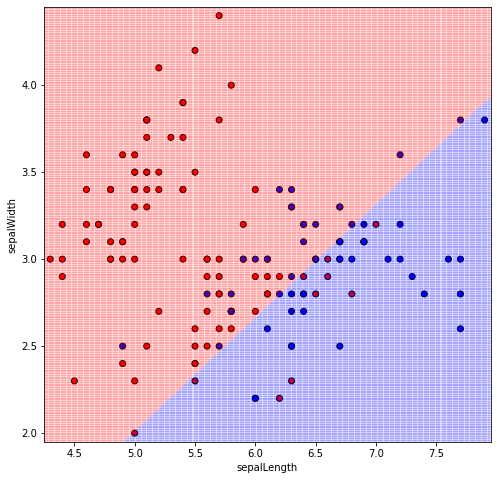

In [45]:
clf = LogisticRegression(solver='liblinear')
clf.fit(x_2,y)
plt.figure(figsize=(8,8))
featureSpacePlot(featureX,featureY,x,y,clf,plt)

- the boundary is a straight line

In [46]:
# use a different 2 features
featureX = 'petalWidth'
featureY = 'petalLength'
x_2 = x[[featureX,featureY]]
#notice that we've already done y = (iris['target']==2).astype(np.int) 
x_2

,petalWidth,petalLength
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


In [47]:
clf = LogisticRegression(solver='lbfgs',C=10**10,random_state=42)
clf.fit(x_2,y)

x0, x1 = np.meshgrid(
        np.linspace(x_2[featureX].min(), x_2[featureX].max(), 200).reshape(-1, 1),
        np.linspace(x_2[featureY].min(), x_2[featureY].max(), 500).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = clf.predict_proba(X_new) 

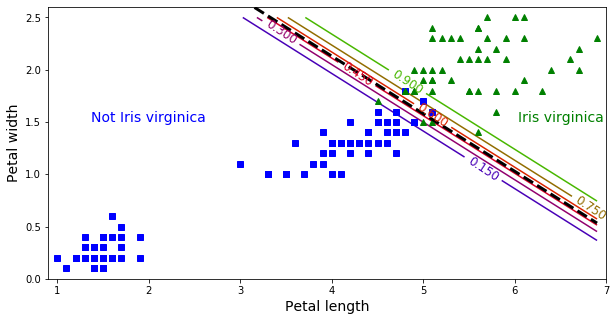

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(np.array(x_2)[y==0,1],np.array(x_2)[y==0,0],"bs") #not iris virginica
plt.plot(np.array(x_2)[y==1,1],np.array(x_2)[y==1,0], "g^") #iris virginica

zz = y_proba[:,1].reshape(x0.shape)
contour = plt.contour(x1,x0,zz,cmap=plt.cm.brg)

left_right = np.array([x_2[featureY].min(), x_2[featureY].max()])
boundary = -(clf.coef_[0][1] * left_right + clf.intercept_[0]) / clf.coef_[0][0]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3) #plot the boundary
plt.text(2, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 1.5, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.xlim(x1.min()-0.1,x1.max()+0.1)
plt.ylim(x0.min()-0.1,x0.max()+0.1)
plt.show()

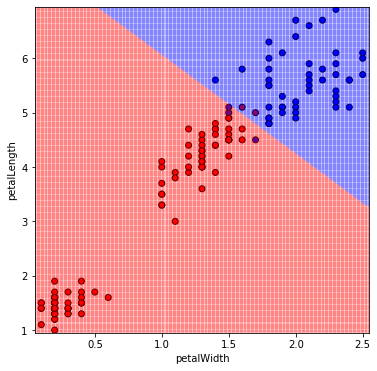

In [49]:
plt.figure(figsize=(6, 6))
featureSpacePlot(featureX,featureY,x,y,clf,plt);

In [50]:
## Extend to multi-class

In [51]:
y_new = iris['target']
y_new #0 = setosa, 1 = versicolor, 2 = viginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10,random_state=42)
softmax_reg.fit(x_2,y_new)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

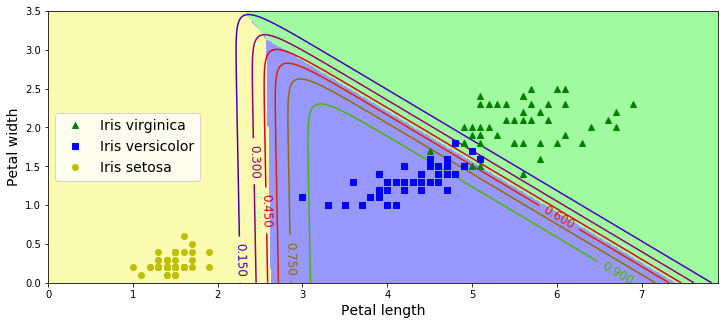

In [53]:
x0, x1 = np.meshgrid(
        np.linspace(0, x_2[featureX].max()+1, 200).reshape(-1, 1),
        np.linspace(0, x_2[featureY].max()+1, 500).reshape(-1, 1))
x_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(x_new)
y_predict = softmax_reg.predict(x_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(12, 5))
plt.plot(np.array(x_2)[y_new==2, 1], np.array(x_2)[y_new==2, 0], "g^", label="Iris virginica")
plt.plot(np.array(x_2)[y_new==1, 1], np.array(x_2)[y_new==1, 0], "bs", label="Iris versicolor")
plt.plot(np.array(x_2)[y_new==0, 1], np.array(x_2)[y_new==0, 0], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x1, x0, zz, cmap=custom_cmap)
contour = plt.contour(x1, x0, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.xlim(x1.min(),x1.max())
plt.ylim(x0.min(),x0.max())
plt.show()

## **Classification Metrics**

In [54]:
from sklearn.metrics import plot_confusion_matrix

In [55]:
x.drop(['species'],axis=1)

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
# Classification Model
log_reg = LogisticRegression(solver='liblinear')

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
# first model with 2 features
X_2 = x[['sepalLength','sepalWidth']]
log_reg.fit(X_2,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pre = log_reg.predict(X_2)
print(y_pre)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0
 0 0]


In [61]:
confusion_matrix(y,y_pre)

array([[84, 16],
       [25, 25]], dtype=int64)

In [62]:
# define plot function
import matplotlib as mpl
def plot_cm(clf, X, y, display_labels):
    mpl.rcParams.update({'font.size': 16})
    plot_confusion_matrix(clf, X, y, display_labels=display_labels,cmap=mpl.cm.Blues)

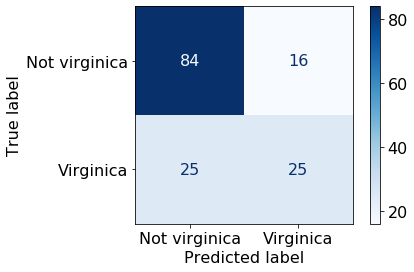

In [63]:
plot_cm(log_reg,X_2,y,display_labels=['Not virginica','Virginica'])

In [64]:
#use all four features
x_4

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
log_reg.fit(x_4,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pre = log_reg.predict(x_4)

In [67]:
confusion_matrix(y,y_pre)

array([[97,  3],
       [ 0, 50]], dtype=int64)

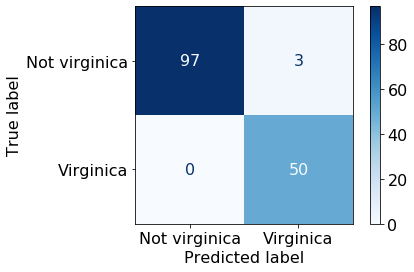

In [68]:
plot_cm(log_reg,x_4,y,display_labels=['Not virginica','Virginica'])

## Accuracy

In [69]:
acc = log_reg.score(x_4,y)
print('Accuracy of the training set : {:3f}'.format(acc))

Accuracy of the training set : 0.980000


In [70]:
(97+50)/150

0.98

## Recall and Precision and F Score

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y,y_pre))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       100
           1       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.97      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



# **KNN (K Nearest Neighbours)**

In [73]:
x_4.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
# we only predict virginica
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Case study of KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Sepal length and sepal width as features
featureX = 'sepalLength'
featureY = 'sepalWidth'

In [77]:
x_2_new = x_4[[featureX,featureY]]
x_2_new.head()

,sepalLength,sepalWidth
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [78]:
k = 3
clf = KNeighborsClassifier(k)
clf.fit(x_2_new,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

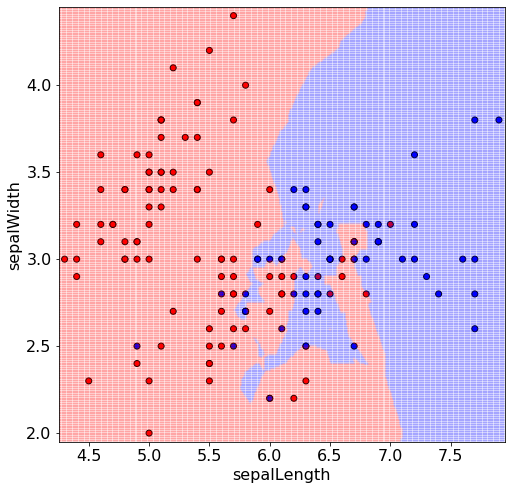

In [79]:
plt.figure(figsize=(8,8))
featureSpacePlot(featureX,featureY,x_4,y,clf,plt)

In [80]:
y_pre_knn = clf.predict(x_2_new)

In [81]:
confusion_matrix(y,y_pre_knn)

array([[86, 14],
       [ 8, 42]], dtype=int64)

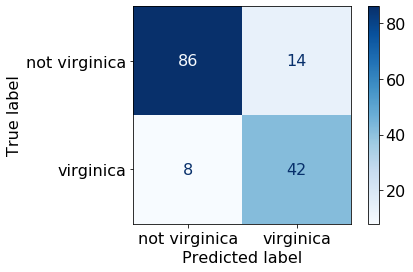

In [82]:
plot_cm(clf,x_2_new,y,display_labels=['not virginica','virginica'])

In [83]:
# now changing the weighting, above we used equal weights, now we switch to distance
clf = KNeighborsClassifier(k,weights='distance')
clf.fit(x_2_new,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

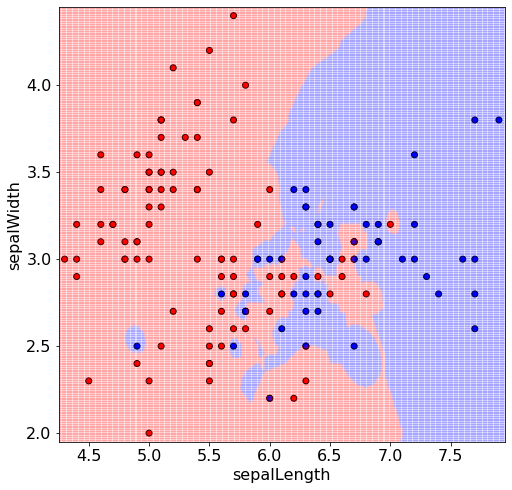

In [84]:
plt.figure(figsize=(8,8))
featureSpacePlot(featureX,featureY,x_2_new,y,clf,plt)

In [85]:
y_pre_knnd = clf.predict(x_2_new)

In [86]:
confusion_matrix(y,y_pre_knnd)

array([[97,  3],
       [ 8, 42]], dtype=int64)

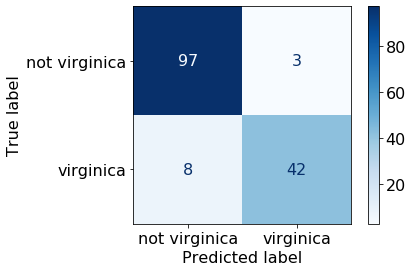

In [87]:
plot_cm(clf, x_2_new, y, display_labels=['not virginica','virginica'])

## Changing the Value of K and Accuracy

- Dependency of accuracy on K 

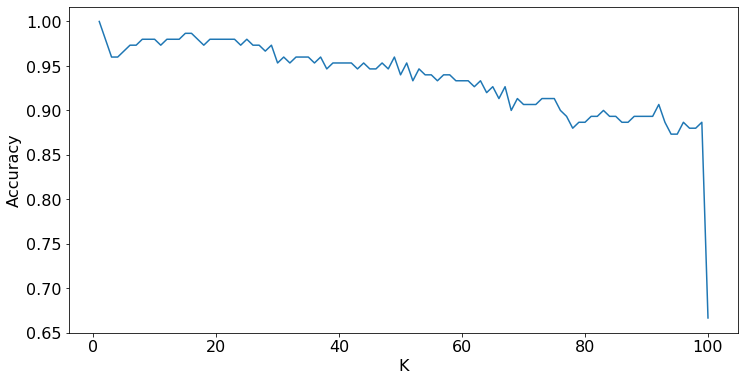

In [88]:
accs = []
ks = []
# K 's number cannot exceed 100 since the non-virginica is 100
for k in range(1,101,1):
    knn = KNeighborsClassifier(n_neighbors=k,p=2)
    knn.fit(x_4,y)
    y_predict_knn = knn.predict(x_4)
    cm = confusion_matrix(y,y_predict_knn)
    acc = knn.score(x_4,y)
    ks.append(k)
    accs.append(acc)

plt.figure(figsize=(12,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(ks,accs)

## Multiclass Classification

In [89]:
#we use the original y 
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
clf = KNeighborsClassifier(k,weights='distance')
clf.fit(x_2_new,y_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='distance')

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

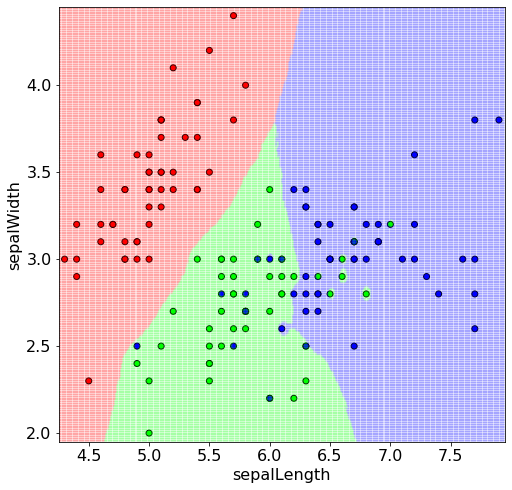

In [91]:
plt.figure(figsize=(8,8))
featureSpacePlot(featureX,featureY,x_4,y_new,clf,plt)

In [92]:
# genrate the multiclass confusion matrix
K = 20
clf = KNeighborsClassifier(k,weights='distance')
clf.fit(x_2_new,y_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='distance')

In [93]:
y_pred_knn = clf.predict(x_2_new)
print(y_pred_knn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 2
 2 1]


In [94]:
confusion_matrix(y_new,y_pred_knn)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0, 10, 40]], dtype=int64)

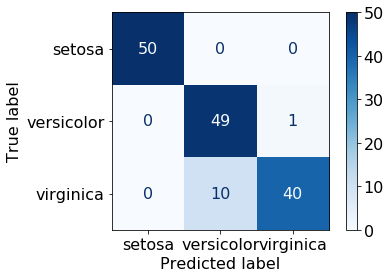

In [95]:
plot_cm(clf, x_2_new, y_new, display_labels=['setosa','versicolor','virginica'])

In [96]:
print(classification_report(y_new,y_pre_knn))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        50
           1       0.25      0.28      0.26        50
           2       0.00      0.00      0.00        50

    accuracy                           0.43       150
   macro avg       0.26      0.43      0.32       150
weighted avg       0.26      0.43      0.32       150



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
